In [17]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
import pandas as pd

In [18]:
df=pd.read_csv('../2k.dat',sep=' ')
df

,x1,y1,x2,y2,t,r,E
0,1.00000,2.00000,2.00000,-1.000000,0.000,3.16228,8.300303e-322
1,1.00000,2.00000,2.00000,-0.999500,0.001,3.16180,8.300303e-322
2,1.00000,2.00000,2.00000,-0.998999,0.002,3.16133,8.300303e-322
3,1.00000,2.00000,2.00000,-0.998498,0.003,3.16085,8.300303e-322
4,1.00000,2.00000,2.00000,-0.997996,0.004,3.16037,8.300303e-322
...,...,...,...,...,...,...,...
9996,-5.00289,-2.58016,9.50361,9.723210,9.996,19.02130,8.300303e-322
9997,-5.00365,-2.58060,9.50456,9.724260,9.997,19.02360,8.300303e-322
9998,-5.00441,-2.58104,9.50552,9.725300,9.998,19.02590,8.300303e-322
9999,-5.00518,-2.58148,9.50647,9.726350,9.999,19.02820,8.300303e-322


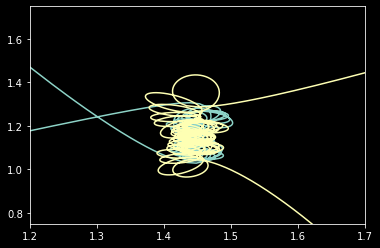

In [22]:
plt.style.use('dark_background')
plt.plot(df['x1'],df['y1'])
plt.plot(df['x2'],df['y2'])
plt.savefig('planet2.svg')

axes = plt.gca()
axes.set_xlim(1.2,1.7)
axes.set_ylim(0.75,1.75)
plt.savefig('planet2-zoom.svg')

In [20]:
# initialization function 
def init(): 
	# creating an empty plot/frame 
	line1.set_data([], []) 
	line2.set_data([], []) 
	points.set_data([], [])
	return line1, line2, points

# animation function 
def animate(i): 
	k = 10*i
	# x, y values to be plotted 
	x1 = df['x1'][k]
	y1 = df['y1'][k]
	x2 = df['x2'][k]
	y2 = df['y2'][k]
	
	# appending new points to x, y axes points list 
	x1data.append(x1) 
	y1data.append(y1)
	x2data.append(x2)
	y2data.append(y2)

	line1.set_data(x1data, y1data) 
	line2.set_data(x2data, y2data)
	points.set_data([x1,x2], [y1,y2])
	return line1, line2 , points

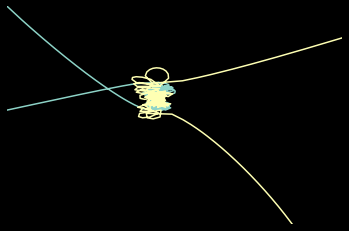

In [21]:
plt.style.use('dark_background')

# lists to store x and y axis points 
x1data, y1data, x2data, y2data = [], [], [], [] 

fig = plt.figure() 
ax = plt.axes(xlim=(1,2), ylim=(0,2)) 
line1, = ax.plot([], []) 
line2, = ax.plot([], []) 
points, = ax.plot([], [], 'o')

# setting a title for the plot 
# plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate,  init_func=init,
							frames=1000, interval=20, blit=True) 

# save the animation as mp4 video file 
anim.save('planet2.gif',writer='imagemagick') 